# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.optimize import minimize
from types import SimpleNamespace
from scipy.optimize import minimize_scalar


# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject
from inauguralproject import MarketModel


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

To illustrate the combinations of X1A and X2A that leave both players as least as wekk off as they were when consuming their endowments, we first call our model.

Then we find the pareto-improvements for different endowments levels. The pareto improvement set, is plottet into the edgeworth box. 

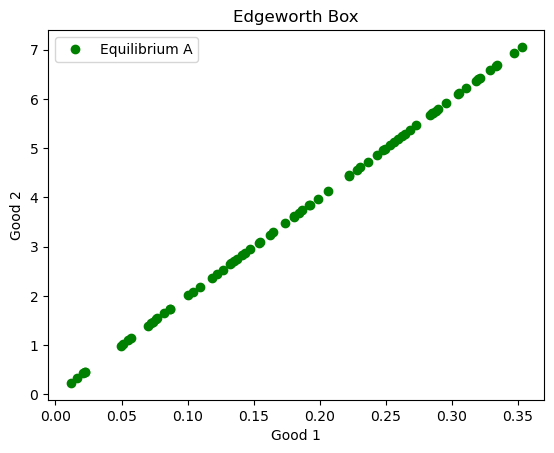

In [16]:

market_model = MarketModel()
market_model.plot_edgeworth_box()


# Question 2

In the following code, we calculate the error in the market clearing condition. 

We first define the p1 range, and then iterate over each value of p1. Then we calculate the error, for each p1 value. 

In [17]:
# code
market = MarketModel()
market.calculate_errors()

For p1 = 0.50, Error: ε(p, ω) = (0.5333, -0.2667)
For p1 = 0.70, Error: ε(p, ω) = (0.2095, -0.1467)
For p1 = 0.90, Error: ε(p, ω) = (0.0296, -0.0267)
For p1 = 1.10, Error: ε(p, ω) = (-0.0848, 0.0933)
For p1 = 1.30, Error: ε(p, ω) = (-0.1641, 0.2133)
For p1 = 1.50, Error: ε(p, ω) = (-0.2222, 0.3333)
For p1 = 1.70, Error: ε(p, ω) = (-0.2667, 0.4533)
For p1 = 1.90, Error: ε(p, ω) = (-0.3018, 0.5733)
For p1 = 2.10, Error: ε(p, ω) = (-0.3302, 0.6933)
For p1 = 2.30, Error: ε(p, ω) = (-0.3536, 0.8133)
For p1 = 2.50, Error: ε(p, ω) = (-0.3733, 0.9333)


# Question 3

To find the market clearing price, we have used the market_clearing_condition formula. 

In [18]:

market = MarketModel()

# Finding p1 that satisfies the market clearing condition using fsolve. This is done by finding the price p1, that makes the funtion return 0. Meaning there is no exces demand or supply.
market_clearing_price = fsolve(market.market_clearing_condition, x0=1)  # Starting guess at p1 = 1
print(f"Market clearing price for good 1 (p1): {market_clearing_price[0]}")


Market clearing price for good 1 (p1): 0.9444444444444446


# Question 4.a

We compare the allocations differ to possible price range through guestion 4a and 4b.

To find allocation, we use demand function and utility function. Eventually we find optimal price and maximum utility. 

In [19]:
# Display the results
import numpy as np
# Parameters
N = 75
alpha = 1/3

# Initial endowments
w_1_A = 0.8
w_2_A = 0.3

# Price of good 2 (numeraire)
p_2 = 1

# Agent A's utility function
def u_A(x_1, x_2):
    return x_1**alpha * x_2**(1-alpha)

# Agent A's demand functions for goods 1 and 2
def A_demand_1(p_1, w_1_A, w_2_A):
    return alpha * (p_1 * w_1_A + p_2*w_2_A) / p_1

def A_demand_2(p_1, w_1_A, w_2_A):
    return (1-alpha) * (p_1 * w_1_A + p_2*w_2_A) / p_2

# Create the price grid P1
P1 = 0.5 + 2*np.arange(N)/N

# Optimization loop
max_utility = -np.inf
optimal_p1 = None

for p_1 in P1:
    # Calculate demands for A at this price
    x_1_A = A_demand_1(p_1, w_1_A, w_2_A)
    x_2_A = A_demand_2(p_1, w_1_A, w_2_A)

    # Calculate utility for A at this price
    current_utility = u_A(x_1_A, x_2_A)

    # Update maximum utility and optimal price if current utility is higher
    if current_utility > max_utility:
        max_utility = current_utility
        optimal_p1 = p_1

# Display the results
print("Optimal price p1 in P1:", optimal_p1)
print("Maximum utility for A:", max_utility)

Optimal price p1 in P1: 2.4733333333333336
Maximum utility for A: 0.891562906874459


# Question 4.b

In [20]:
import numpy as np
#Parameters
N = 75
alpha = 1/3
#Initial endowments
w_1_A = 0.8
w_2_A = 0.3
#Price of good 2 (numeraire)
p_2 = 1
#A's utility function
def u_A(x_1, x_2):
    return x_1alpha * x_2(1-alpha)
# demand functions for goods 1 and 2
def A_demand_1(p_1, w_1_A, w_2_A):
    return alpha * (p_1 * w_1_A + p_2*w_2_A) / p_1
def A_demand_2(p_1, w_1_A, w_2_A):
    return (1-alpha) * (p_1 * w_1_A + p_2*w_2_A) / p_2
#Create the price grid P1
P1 = 0.5 + 2*np.arange(N)/N
#Optimization loop
max_utilityb = -np.inf
optimal_p1b = None
from scipy.optimize import minimize_scalar
def find_equilibrium_price(self):
    epsilon = 1e-6
    result = minimize_scalar(self.sxcess_demand, bounds = (epsilon,np.inf), method='bounded')
    if result.success:
        return result.x
    else:
        raise ValueError('Equilibrium price not found.')

print("Optimal price p1 in P1:", optimal_p1b)
print("Maximum utility for A:", max_utilityb)

Optimal price p1 in P1: None
Maximum utility for A: -inf


# Question 5.a

To find the allocation we first set up the constraint that the the utility of B must not be worse than that of the utility at the initial endowment. Following this, we maximize the utility of A such that the utility is maximized within the constraint and for set C. Since (1-alpha) is greater than alpha, A will benefit from a larger consumption of good 2. This is also the case from our results. Furthermore, the utility of B when calculated is seen to converge to the utility at the initial endowment, which would make sense since it is beneficial for A to minimize the utility of B within the constraint

In [21]:
# model
market = MarketModel()
# Find allocation
alloc_Aa = market.find_alloc5a()
alloc_Ba = 1-alloc_Aa
print("Optimal allocation of A: x1A =", "{:.4f}".format(alloc_Aa[0]), ", x2A =", "{:.4f}".format(alloc_Aa[1]))
print("Optimal allocation of B: x1B =", "{:.4f}".format(alloc_Ba[0]), ", x2B =", "{:.4f}".format(alloc_Ba[1]))

Optimal allocation of A: x1A = 0.5757 , x2A = 0.8444
Optimal allocation of B: x1B = 0.4243 , x2B = 0.1556


# Question 5.b

The main difference to question 5a is adjusting the allocation to incorporate the neccesary bounds for consumption of goods 1 and 2, which are now in the interval of $[0,1]$ instead of having to be in set C. Furthermore, the constraint for the utility of B being greater than, or equal to that of their utility at initial endowment is still relevant.

In [22]:
market = MarketModel()

# allocation
alloc_Ab = market.find_alloc5b()
alloc_Bb = 1-alloc_Ab
print("Optimal allocation of A: x1A =", "{:.4f}".format(alloc_Ab[0]), ", x2A =", "{:.4f}".format(alloc_Ab[1]))
print("Optimal allocation of B: x1B =", "{:.4f}".format(alloc_Bb[0]), ", x2B =", "{:.4f}".format(alloc_Bb[1]))



Optimal allocation of A: x1A = 0.6809 , x2A = 0.7251
Optimal allocation of B: x1B = 0.3191 , x2B = 0.2749


# Question 6.a

To maximize the aggregate utility chosen by a utiliatian social planner, we first define the new utility function. 

In [23]:
model = MarketModel()
    
#Initial guess
x0 = [0.5, 0.5]
bounds = [(0,1), (0,1)]

result = minimize(model.objective6a, x0, bounds=bounds)

#Results
x1A_opt, x2A_opt = result.x
x1B_opt, x2B_opt = 1-x1A_opt, 1-x2A_opt

print(f"Optimal allocation for A: x1A = {x1A_opt:.4f}, x2A = {x2A_opt:.4f}")
print(f"Optimal allocation for B: x1B = {x1B_opt:.4f}, x2B = {x2B_opt:.4f}")


Optimal allocation for A: x1A = 0.5000, x2A = 0.5000
Optimal allocation for B: x1B = 0.5000, x2B = 0.5000


# Question 6.b

We will now compare our results in questions 3 to 5

In [24]:
#Market clearing price in question 3
market_clearing_price = fsolve(market.market_clearing_condition, x0=1)  # Starting guess at p1 = 1
print(f"Market clearing price for good 1 (p1): {market_clearing_price[0]}")

#Insert results from q4a
print("Optimal price p1 in P1:", optimal_p1)
print("Maximum utility for A:", max_utility)

#Insert results from q4b
print("Optimal price p1 in P1:", optimal_p1b)
print("Maximum utility for A:", max_utilityb)

#Insert results from q5a
print("Optimal allocation of A: x1A =", "{:.4f}".format(alloc_Aa[0]), ", x2A =", "{:.4f}".format(alloc_Aa[1]))
print("Optimal allocation of B: x1B =", "{:.4f}".format(alloc_Ba[0]), ", x2B =", "{:.4f}".format(alloc_Ba[1]))

#Insert results from q5b
print(f"Optimal allocation for A: x1A = {x1A_opt:.4f}, x2A = {x2A_opt:.4f}")
print(f"Optimal allocation for B: x1B = {x1B_opt:.4f}, x2B = {x2B_opt:.4f}")


Market clearing price for good 1 (p1): 0.9444444444444446
Optimal price p1 in P1: 2.4733333333333336
Maximum utility for A: 0.891562906874459
Optimal price p1 in P1: None
Maximum utility for A: -inf
Optimal allocation of A: x1A = 0.5757 , x2A = 0.8444
Optimal allocation of B: x1B = 0.4243 , x2B = 0.1556
Optimal allocation for A: x1A = 0.5000, x2A = 0.5000
Optimal allocation for B: x1B = 0.5000, x2B = 0.5000


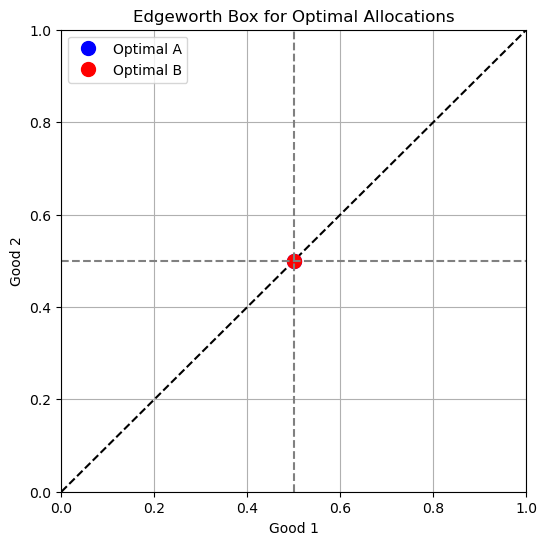

In [25]:
model= MarketModel()
model.edgeworth6b()

# Question 7

To draw a random set with 50 elements, we first set a seed.

Then we draw 50 elements for w1A and w2A from the uniform distribution.  Combine it in a tuple, W, and display the 50 sets. 

In [26]:
model = MarketModel()
model.set7()

set seed to 1987 and create numbers:
Set W:
Element 1: (0.2292, 0.7708)
Element 2: (0.0691, 0.9309)
Element 3: (0.7093, 0.2907)
Element 4: (0.7338, 0.2662)
Element 5: (0.4478, 0.5522)
Element 6: (0.0551, 0.9449)
Element 7: (0.2404, 0.7596)
Element 8: (0.3611, 0.6389)
Element 9: (0.5178, 0.4822)
Element 10: (0.1706, 0.8294)
Element 11: (0.3885, 0.6115)
Element 12: (0.4028, 0.5972)
Element 13: (0.2852, 0.7148)
Element 14: (0.7362, 0.2638)
Element 15: (0.4817, 0.5183)
Element 16: (0.3597, 0.6403)
Element 17: (0.4942, 0.5058)
Element 18: (0.0722, 0.9278)
Element 19: (0.8822, 0.1178)
Element 20: (0.6804, 0.3196)
Element 21: (0.6468, 0.3532)
Element 22: (0.4163, 0.5837)
Element 23: (0.1439, 0.8561)
Element 24: (0.0842, 0.9158)
Element 25: (0.3064, 0.6936)
Element 26: (0.1938, 0.8062)
Element 27: (0.1869, 0.8131)
Element 28: (0.4978, 0.5022)
Element 29: (0.7290, 0.2710)
Element 30: (0.1302, 0.8698)
Element 31: (0.1064, 0.8936)
Element 32: (0.3360, 0.6640)
Element 33: (0.7113, 0.2887)
Element 

# Question 8

To find the market equilibrium allocation for each wA drawn in the previous exercise, we define a new model. 

We find the equilibirum price and quantity, and insert them into an edgeworth box. 

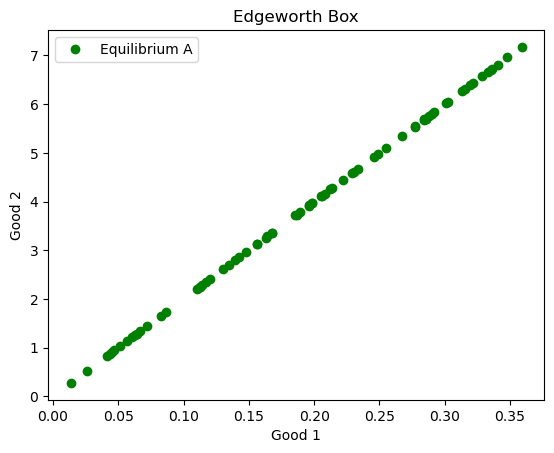

In [27]:
model = MarketModel()
model.plot_edgeworth_box()